# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Imports and getting the first file
import pandas as pd
import requests as rq
TwArEn_df = pd.read_csv("twitter-archive-enhanced.csv")

In [2]:
# Checking the first tweets file
TwArEn_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#getting the second file
file = rq.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv", allow_redirects=True)
open("image_predictions.tsv", "wb").write(file.content)

335079

In [4]:
# Reading the second file as a tab sep file.
df_img=pd.read_csv("image_predictions.tsv",sep='\t')

In [5]:
# Checking tthe second file
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet-json.txt)

In [6]:
# We chose to use the shortcut without a twitter account

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = TwArEn_df.tweet_id.values
len(tweet_ids)

count = 0
fails_dict = {}
start = timer()


In [7]:
# check if the api is working?
api

In [8]:
# The following code is for creating the dataframe (third file)

temp_list = [] #Should be a list of the dicts in the file.
with open('tweet-json.txt', "r") as file:
    for line in file.readlines():
        res_dict = json.loads(line)
        temp_list.append(res_dict)

#Make the dataframe
json_frame = pd.DataFrame(temp_list)

In [9]:
# Check if it worked 01
temp_list[:2]

[{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
  'id': 892420643555336193,
  'id_str': '892420643555336193',
  'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
  'truncated': False,
  'display_text_range': [0, 85],
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [],
   'urls': [],
   'media': [{'id': 892420639486877696,
     'id_str': '892420639486877696',
     'indices': [86, 109],
     'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
     'url': 'https://t.co/MgUWQ76dJU',
     'display_url': 'pic.twitter.com/MgUWQ76dJU',
     'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
     'type': 'photo',
     'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
      'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
      'small': {'w': 540, 'h': 528, 'resize': 'fit'},

In [10]:
# Check if it worked 02
json_frame[["id", "favorite_count", "retweet_count"]].head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


## Assessing Data




**First thing first, visual assesment:**

In [11]:
#Let's check how the data looks like (The first dataframe)
TwArEn_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
TwArEn_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
#Let's check how the data looks like (The Second dataframe)
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
df_img.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [15]:
#Let's check how the data looks like (The Third dataframe)
json_frame.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [16]:
json_frame.tail()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
2349,None,None,Mon Nov 16 00:24:50 +0000 2015,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...",111,False,Here we have a 1949 1st generation vulpix. Enj...,None,...,False,NaN,NaN,NaN,41,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2350,None,None,Mon Nov 16 00:04:52 +0000 2015,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...",311,False,This is a purebred Piers Morgan. Loves to Netf...,None,...,False,NaN,NaN,NaN,147,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2351,None,None,Sun Nov 15 23:21:54 +0000 2015,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...",128,False,Here is a very happy pup. Big fan of well-main...,None,...,False,NaN,NaN,NaN,47,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2352,None,None,Sun Nov 15 23:05:30 +0000 2015,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...",132,False,This is a western brown Mitsubishi terrier. Up...,None,...,False,NaN,NaN,NaN,48,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2353,None,None,Sun Nov 15 22:32:08 +0000 2015,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...",2535,False,Here we have a Japanese Irish Setter. Lost eye...,None,...,False,NaN,NaN,NaN,532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


**After that, we proceed with the programmatic assisment so that we make a complete idea about the issues**

In [17]:
print(TwArEn_df.shape)
print()
print(TwArEn_df.info())
print()
for i in TwArEn_df.duplicated():
    if i == True:
        print("True")
    elif i == False:
        pass

print()
TwArEn_df.isnull().sum()

(2356, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), 

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [18]:
# We decided to check the names again in case of any outlayer

l = TwArEn_df.name.unique()

for i in l:
    if len(i)<=4 and i[0].islower():
        print(i, end = ' ')

such a not one mad an very just my his this all old the by life 

Going to the second file

In [19]:
print(df_img.shape)
print()
print(df_img.info())
print()
for i in df_img.duplicated():
    if i == True:
        print("True")
    elif i == False:
        pass

print()
df_img.isnull().sum()

(2075, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB
None




tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

Going to the third file

In [20]:

print(json_frame.shape)
print()
print(json_frame.info())
print()
# for i in json_frame.duplicated():
#     if i == True:
#         print("True")
#     elif i == False:
#         pass
json_frame.isnull().sum()

(2354, 31)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

### Quality issues

0- Remove Retweets rows, remove retweets (text column starts with RT @) as a user can retweet their on tweet. 

1- In the TwArEn_df, we relized that the time stamp datatype is not date, but object. and needs to be changed that's in addition to the ('created at') in dataframe_json is not date type.

2- In the TwArEn_df, we relized that there are many None values in the name, in addition to other arbitary values.

3- In the TwArEn_df, we found that many columns are making a mess and are not necessary, we will drop them.

4- The url in the source column still have the html format, we will make it atomic url.

5- Tweet_Id Column in all the data frames should be "object" datatype, that's because it is a long number.

6- The raiting neoominator and denominator should be floats because there are many decimals in the ratings

.
.

df_img:

1- no issues
.
.



dataframe_json:
.

7- alot of null values in a lot of columns, so we gonna drop it.

8- The source is in html format, we will filter it to the atomic shape.




### Tidiness issues
1- Some merge should be done for the first two tables with the tweet ID, to make it a whole

2- in the first table, the last four chractaristics  [doggo	floofer	pupper	puppo] can be changed to score (each is = to 1) so that we can use it in our analysis. In addition to that, we will compine them into one column to make the data tidy.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [74]:
# Make copies of original pieces of data
TwArEn_df_clean = TwArEn_df.copy()
df_img_clean = df_img.copy()
json_frame_clean = json_frame.copy()

### Issue #0:

#### Define: 


0- Remove Retweets rows, remove retweets (text column starts with RT @) as a user can retweet their on tweet.

#### Code

In [75]:
TwArEn_df_clean = TwArEn_df_clean[TwArEn_df_clean.retweeted_status_id.isnull()]
TwArEn_df_clean = TwArEn_df_clean[TwArEn_df_clean.retweeted_status_user_id.isnull()]
TwArEn_df_clean = TwArEn_df_clean[TwArEn_df_clean.retweeted_status_timestamp.isnull()]

#### Test

In [76]:
# Shape before
TwArEn_df_clean.shape

(2175, 17)

In [77]:
# Shape after
TwArEn_df_clean.shape

(2175, 17)

### Issue #1:

#### Define: 
1- In the TwArEn_df, we relized that the time stamp datatype is not date, but object. and needs to be changed that's in addition to the ('created at') in dataframe_json is not date type.

#### Code

In [78]:
TwArEn_df_clean.timestamp = pd.to_datetime(TwArEn_df_clean.timestamp)
json_frame_clean.created_at = pd.to_datetime(json_frame_clean.created_at)


#### Test

In [79]:
TwArEn_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), flo

In [80]:
json_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-

### Issue #2:

#### Define
In the TwArEn_df, we relized that there are many None values in the name, in addition to other arbitary values.


#### Code

In [81]:
# We will replace all the arbitary values with not avilable in the name column
# The words [starts with lower case]: 
# such a not one mad an very just my his this all old the by life
import numpy as np
TwArEn_df_clean['name'].replace({"None": np.nan, "a": np.nan, "such": np.nan, "not":np.nan, "one":np.nan, "mad":np.nan, "an":np.nan, "very":np.nan, "just":np.nan, "his":np.nan, "this":np.nan, "all":np.nan, "old":np.nan, "the":np.nan, "by":np.nan, "life":np.nan}, inplace=True)

#### Test

In [82]:
TwArEn_df_clean.name.unique()
print(TwArEn_df.name.nunique())

957


In [83]:
# The arbitrary values  are not here anymore 
TwArEn_df_clean.name.nunique()

940

### Issue #3:

#### Define

In the TwArEn_df, we found that many columns are making a mess and are not necessary, we will drop them.

**Code**

In [84]:
TwArEn_df_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [85]:
TwArEn_df_clean.drop([ 'in_reply_to_status_id', 'in_reply_to_user_id',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls'], axis=1, inplace = True) 

**Test**

In [86]:
# TwArEn_df.drop(['column_1', 'Column_2'], axis = 1, inplace = True) 
TwArEn_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #4:

#### Define

The url in the source column still have the html format, we will make it atomic url.

**Code**

In [87]:
new = []
for row in TwArEn_df_clean['source']:
    val = row.split('"')[1]
    new.append(val)


In [88]:
# to replace the source column with the list we have made:
n = TwArEn_df_clean.columns[2]

# # Drop that column
# TwArEn_df_clean['source'].drop(n, axis = 1, inplace = True)

# # Put whatever series you want in its place
TwArEn_df_clean["Source_new"] = new

**Test**

In [89]:
TwArEn_df.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

So we will split them by the " sign 

In [90]:
# new = []
# for row in TwArEn_df_clean['source']:
#     val = row.split('"')[1]
#     print(val)

In [91]:
TwArEn_df_clean["Source_new"][0]

'http://twitter.com/download/iphone'

### Issue #5:

5- Tweet_Id Column in all the data frames should be "object" datatype, that's because it is a long number.

**Code**

In [92]:
TwArEn_df_clean.tweet_id = TwArEn_df_clean.tweet_id.astype(str)
df_img_clean.tweet_id = df_img_clean.tweet_id.astype(str)
json_frame_clean.id = json_frame_clean.id.astype(str)


**Test**

In [93]:
TwArEn_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1405 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
Source_new            2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 283.9+ KB


In [94]:
df_img_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [95]:
json_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null object
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non

That means that the code has worked

### Issue #6:

#### Define

6- The raiting neoominator and denominator should be floats because there are many decimals in the ratings

**Code**

In [96]:
TwArEn_df_clean.columns 

Index(['tweet_id', 'timestamp', 'source', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'Source_new'],
      dtype='object')

In [97]:
TwArEn_df_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
Source_new                    object
dtype: object

In [98]:
TwArEn_df_clean.rating_numerator = TwArEn_df_clean.rating_numerator.astype('float')
TwArEn_df_clean.rating_denominator = TwArEn_df_clean.rating_denominator.astype('float')

**Test**

In [99]:
TwArEn_df_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
rating_numerator             float64
rating_denominator           float64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
Source_new                    object
dtype: object

### Issue #7:


7- in the dataframe_json, alot of null values in a lot of columns, so we gonna drop it.

**Code**

In [100]:
json_frame_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [101]:
json_frame_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null object
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non

In [102]:
#after we defined the columns, we gonna deop it
json_frame_clean.drop(['contributors', 'coordinates', 'display_text_range',
       'entities', 'extended_entities',
       'full_text', 'geo',  'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str', 'user'], axis=1, inplace = True) 

**Test**

In [103]:
# TwArEn_df.drop(['column_1', 'Column_2'], axis = 1, inplace = True) 
json_frame_clean.columns

Index(['created_at', 'favorite_count', 'favorited', 'id', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated'],
      dtype='object')

In [104]:
json_frame_clean.head()

,created_at,favorite_count,favorited,id,retweet_count,retweeted,retweeted_status,source,truncated
0,2017-08-01 16:23:56,39467,False,892420643555336193,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False
1,2017-08-01 00:17:27,33819,False,892177421306343426,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False
2,2017-07-31 00:18:03,25461,False,891815181378084864,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False
3,2017-07-30 15:58:51,42908,False,891689557279858688,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False
4,2017-07-29 16:00:24,41048,False,891327558926688256,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False


### Issue #8:

#### Define

8- The source is in html format, we will filter it to the atomic shape.

**Code**

In [105]:
new2 = []
for row1 in json_frame_clean['source']:
    val1 = row1.split('"')[1]
    new2.append(val1)


In [106]:
# to replace the source column with the list we have made:
n = json_frame_clean.columns[7]

# # Drop that column
# TwArEn_df_clean['source'].drop(n, axis = 1, inplace = True)

# # Put whatever series you want in its place
json_frame_clean["source_new"] = new2

**Test**

In [107]:
json_frame_clean.source[0]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [108]:
json_frame_clean["source_new"][0]

'http://twitter.com/download/iphone'

So we will split them by the " sign 

In [109]:
new = []
for row in json_frame_clean['source']:
    val = row.split('"')[1]
    print(val)

http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/d

http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/d

http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/download/iphone
http://twitter.com/d

In [110]:
json_frame_clean["source_new"][0]

'http://twitter.com/download/iphone'

## Part02 
### Tidiness issues
1- Some merge should be done for the first two tables with the tweet ID, to make it a whole

2- in the first table, the last four chractaristics  [doggo	floofer	pupper	puppo] can be changed to score (each is = to 1) so that we can use it in our analysis, and in addition to that, we can work on compining them to make it tidy

### **Issue01:**

**Define**

1- Some merge should be done for the first two tables with the tweet ID, to make it a whole

**Code**

In [133]:
New_frame = pd.merge(TwArEn_df_clean, df_img_clean, on='tweet_id')

In [135]:
# Rename the id column in json frame to tweet_id
json_frame_clean.rename(columns={'id': 'tweet_id'},
          inplace=True)

In [136]:
#Add the table/dataframe
New_frame = pd.merge(New_frame, json_frame_clean, on='tweet_id')

**Test**

In [114]:
TwArEn_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1405 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
Source_new            2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 283.9+ KB


In [115]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The common column is the tweet Id:

**Let's test if our code worked**

In [116]:
New_frame.head()

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,p3_dog,created_at,favorite_count,favorited,retweet_count,retweeted,retweeted_status,source_y,truncated,source_new
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Phineas,None,None,None,None,...,False,2017-08-01 16:23:56,39467,False,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Tilly,None,None,None,None,...,True,2017-08-01 00:17:27,33819,False,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Archie,None,None,None,None,...,True,2017-07-31 00:18:03,25461,False,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Darla,None,None,None,None,...,False,2017-07-30 15:58:51,42908,False,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Franklin,None,None,None,None,...,True,2017-07-29 16:00:24,41048,False,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone


##### It worked

### **Issue02:**

**Define**

2- in the first table, the last four chractaristics  [doggo	floofer	pupper	puppo] can be changed to score (each is = to 1) so that we can use it in our analysis

**Code**

In [153]:
# First replace None in stage columns with empty string as follows.
New_frame.doggo.replace('None', '', inplace=True)  # Like this do replacements for all four stages
New_frame.floofer.replace('None', '', inplace=True)
New_frame.pupper.replace('None', '', inplace=True)
New_frame.puppo.replace('None', '', inplace=True)

# Then combine stage columns.
New_frame['stage'] = New_frame.doggo + New_frame.floofer + New_frame.pupper + New_frame.puppo

# # Then format entries with multiple dog stages which appeared like doggopupper.

New_frame.loc[New_frame.stage == 'doggopupper', 'stage'] = 'doggo,pupper' 
New_frame.loc[New_frame.stage == 'doggopuppo', 'stage'] = 'doggo,puppo' 
New_frame.loc[New_frame.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'
New_frame.loc[New_frame.stage == 'flooferpupper', 'stage'] = 'floofer,pupper'
New_frame.loc[New_frame.stage == 'flooferpuppo', 'stage'] = 'floofer,puppo'
New_frame.loc[New_frame.stage == 'pupperpuppo', 'stage'] = 'pupper,puppo'


In [154]:
# We will replace all the '' and main values with 1 or 0 and then change the datatype to int, then we will put the sum in another column
import numpy as np
New_frame['doggo'].replace({"": 0, "doggo": 1}, inplace=True)
New_frame['floofer'].replace({"": 0, "floofer": 1}, inplace=True)
New_frame['pupper'].replace({"": 0, "pupper": 1}, inplace=True)
New_frame['puppo'].replace({"": 0, "puppo": 1}, inplace=True)

In [155]:
# Make a new column to collect the numbers 
New_frame['stage_sum'] = New_frame.doggo + New_frame.floofer + New_frame.pupper + New_frame.puppo

In [156]:
# We will delete the non important columns


In [157]:
New_frame.head(40)

,tweet_id,timestamp,source_x,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,...,favorite_count,favorited,retweet_count,retweeted,retweeted_status,source_y,truncated,source_new,stage_sum,stage
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Phineas,0,0,0,0,...,39467,False,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Tilly,0,0,0,0,...,33819,False,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Archie,0,0,0,0,...,25461,False,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Darla,0,0,0,0,...,42908,False,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",12.0,10.0,Franklin,0,0,0,0,...,41048,False,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,0,0,0,0,...,20562,False,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Jax,0,0,0,0,...,12041,False,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,NaN,0,0,0,0,...,56848,False,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",13.0,10.0,Zoey,0,0,0,0,...,28226,False,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,0,
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",14.0,10.0,Cassie,1,0,0,0,...,32467,False,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,http://twitter.com/download/iphone,1,doggo


In [158]:
New_frame.drop(columns=[ 'doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

## **Last but not least** we will drop the duplicated columns if there is

In [159]:
# Let's also drop the reapeated/duplicated columns
New_frame = New_frame.loc[:,~New_frame.columns.duplicated()]

In [160]:
New_frame.columns # Before

Index(['tweet_id', 'timestamp', 'source_x', 'rating_numerator',
       'rating_denominator', 'name', 'Source_new', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'favorite_count', 'favorited', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'source_new',
       'stage_sum', 'stage'],
      dtype='object')

**Test**

In [161]:
New_frame.columns # After

Index(['tweet_id', 'timestamp', 'source_x', 'rating_numerator',
       'rating_denominator', 'name', 'Source_new', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'favorite_count', 'favorited', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'source_new',
       'stage_sum', 'stage'],
      dtype='object')

**ALso Check the datatype**

In [162]:
New_frame.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source_x                      object
rating_numerator             float64
rating_denominator           float64
name                          object
Source_new                    object
jpg_url                       object
img_num                        int64
p1                            object
p1_conf                      float64
p1_dog                          bool
p2                            object
p2_conf                      float64
p2_dog                          bool
p3                            object
p3_conf                      float64
p3_dog                          bool
created_at            datetime64[ns]
favorite_count                 int64
favorited                       bool
retweet_count                  int64
retweeted                       bool
retweeted_status              object
source_y                      object
truncated                       bool
source_new                    object
s

## Cleaning is Done here ############
## - --------------------------------

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [163]:
New_frame.to_csv("twitter_archive_master.csv", index=False)
Last_frame = pd.read_csv("twitter_archive_master.csv")


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

**Here** We will check for three things
1. How much the users rating distripution vary? 
2. what charactaristics popo, floofer, etc, are more present in dogs?
3. Does Retweet count affect Favorite count?

### Visualization and analysis are merged together as the following

### First
**How much the users rating distripution vary?**

In [164]:
Last_frame.columns

Index(['tweet_id', 'timestamp', 'source_x', 'rating_numerator',
       'rating_denominator', 'name', 'Source_new', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'favorite_count', 'favorited', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'source_new',
       'stage_sum', 'stage'],
      dtype='object')

In [165]:
# to answer the question, we will use the 
New_frame.rating_numerator.describe()


count    1994.000000
mean       12.280843
std        41.497718
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### From this very high **STD** we can get our first insight which is that the users ratings are varying a lot, and there are even outlayers for the ratings, although the dominator is 10, but the ratings varied from 0 up to 250 with some out layers

### Second

**what charactaristics popo, floofer, etc, are more present in dogs?**

In order to know that, we shall sum each column as the following:


In [166]:
Last_frame.columns

Index(['tweet_id', 'timestamp', 'source_x', 'rating_numerator',
       'rating_denominator', 'name', 'Source_new', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'favorite_count', 'favorited', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'source_new',
       'stage_sum', 'stage'],
      dtype='object')

In [167]:
grouped = Last_frame.groupby('stage').stage_sum.sum()

In [168]:
grouped

stage
doggo             63
doggo,floofer      2
doggo,pupper      18
doggo,puppo        2
floofer            7
pupper           203
puppo             22
Name: stage_sum, dtype: int64

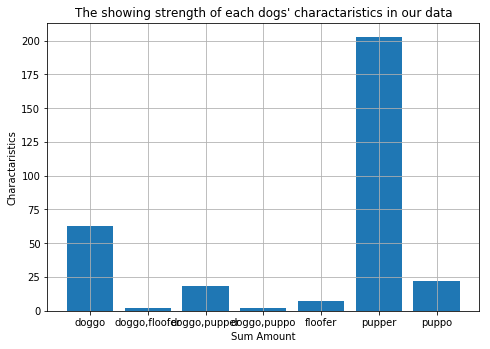

In [170]:
# Plotting the datat to visualize
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
char = ['doggo', 'doggo,floofer','doggo,pupper', 'doggo,puppo', 'floofer', 'pupper', 'puppo']
nums = [63, 2, 18, 2, 7, 203, 22]
ax.bar(char,nums)
plt.xlabel('Sum Amount')
plt.ylabel('Charactaristics')
plt.title("The showing strength of each dogs' charactaristics in our data" )
plt.grid(True)
plt.show()


From the above analysis, we can say the the puper dogs are significantly more present in the cute dogs world and in the page data of dogs' photos.

### Third
**Does Retweet count affect Favorite count?**

In [173]:
Last_frame.columns

Index(['tweet_id', 'timestamp', 'source_x', 'rating_numerator',
       'rating_denominator', 'name', 'Source_new', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'created_at', 'favorite_count', 'favorited', 'retweet_count',
       'retweeted', 'retweeted_status', 'source_y', 'truncated', 'source_new',
       'stage_sum', 'stage'],
      dtype='object')

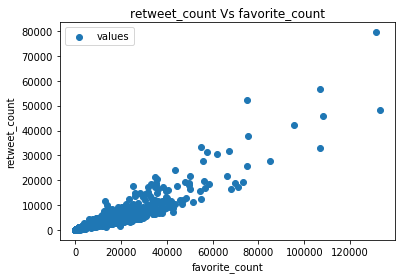

In [174]:
plt.scatter(Last_frame['favorite_count'], Last_frame['retweet_count'], label = "values" )
# Last_frame here is the same as New_frame
plt.ylabel('retweet_count')
plt.xlabel('favorite_count')

plt.title('retweet_count Vs favorite_count')
plt.legend()
plt.show()

From The above scatter, we can see that the retweet_count is dramatically increasing with the increase of favorite_count, whcih is a Positive relationship

### Insights:
1. From this we can get our first insight which is that the users ratings are varying a lot, and there are outlayers for the ratings, although the dominator is 10, but the ratings varied from 0 up to 250 with some out layers

2. We can say the the puper dogs are significantly more present in the cute dogs world and in the page data of dogs' photos.

3. The retweet_count is dramatically increasing with the increase of favorite_count, whcih is a Positive relationship